## HW4

### Question 1

In [11]:
from LOB_GAN_training_raw import train_lob_gan

stock_list = ["0050", "0056", "2330"]

lr_config = {
    "0050": {"lr_g": 0.004, "lr_d": 0.0008},
    "0056": {"lr_g": 0.006, "lr_d": 0.0005},
    "2330": {"lr_g": 0.006, "lr_d": 0.0008},
}

batch_config = {
    "0050": 50,
    "0056": 50,
    "2330": 50,   
}

results = {}

for stock in stock_list:
    print(f"===== Training GAN for {stock} =====")
    cfg = lr_config[stock]
    bs = batch_config[stock]
    res = train_lob_gan(
        stock=stock,
        lr_g=cfg["lr_g"],
        lr_d=cfg["lr_d"],
        batch_size=bs,
        seed=307,
    )
    results[stock] = res

===== Training GAN for 0050 =====
Raw data loading and processing 0050
Data 1 for 0050 loaded.
Data 2 for 0050 loaded.
Data 3 for 0050 loaded.
Minutely data generated.
Start training 0050: epochs=200, batch_size=50, lr_g=0.004, lr_d=0.0008
[Epoch 1/200][Batch 1/1][D train loss: 0.250004][G train loss: 1.294996]
[Epoch 1/200][Batch 1/1][D eval loss: 0.250009][G eval loss: 1.117348]
[Epoch 2/200][Batch 1/1][D train loss: 0.250008][G train loss: 1.269022]
[Epoch 2/200][Batch 1/1][D eval loss: 0.249997][G eval loss: 1.107848]
[Epoch 3/200][Batch 1/1][D train loss: 0.249995][G train loss: 1.259430]
[Epoch 3/200][Batch 1/1][D eval loss: 0.249987][G eval loss: 1.107934]
[Epoch 4/200][Batch 1/1][D train loss: 0.249983][G train loss: 1.259470]
[Epoch 4/200][Batch 1/1][D eval loss: 0.249980][G eval loss: 1.107752]
[Epoch 5/200][Batch 1/1][D train loss: 0.249973][G train loss: 1.259352]
[Epoch 5/200][Batch 1/1][D eval loss: 0.249968][G eval loss: 1.106480]
[Epoch 6/200][Batch 1/1][D train loss: 0

In [1]:
from LOB_GAN_training_raw import train_lob_gan
stock_list = ["0050", "0056", "2330"]

lr_g_candidates = [0.002,0.004,0.006,0.008,0.01]
lr_d_candidates = [0.0003,0.0005,0.0008,0.0015,0.002]

batch_size = 50
seed = 307

all_results = {}

best_config = {}
best_score = {}

for stock in stock_list:
    print(f"\n========== Grid search for {stock} ==========")
    best_config[stock] = None
    best_score[stock] = float("inf")

    for lr_g in lr_g_candidates:
        for lr_d in lr_d_candidates:
            print(f"\n----- {stock}: lr_g={lr_g}, lr_d={lr_d} -----")
            res = train_lob_gan(
                stock=stock,
                lr_g=lr_g,
                lr_d=lr_d,
                batch_size=batch_size,
                seed=seed,
            )

            if res is None:
                print(f"[WARN] {stock} lr_g={lr_g} lr_d={lr_d}")
                continue

            eval_g = res["eval_g_loss"]
            eval_d = res["eval_d_loss"]
            if len(eval_g) == 0 or len(eval_d) == 0:
                print(f"[WARN] {stock} lr_g={lr_g} lr_d={lr_d}")
                continue

            score = eval_g[-1] + eval_d[-1]
            print(f"[INFO] {stock} lr_g={lr_g} lr_d={lr_d} -> score={score:.6f}")

            all_results[(stock, lr_g, lr_d)] = {
                "res": res,
                "score": score,
            }

            if score < best_score[stock]:
                best_score[stock] = score
                best_config[stock] = (lr_g, lr_d)

    print(f"\n>>> Best config for {stock}: "
          f"lr_g={best_config[stock][0]}, lr_d={best_config[stock][1]}, "
          f"score={best_score[stock]:.6f}")

print("\n========== Grid search finished ==========")
for stock in stock_list:
    if best_config[stock] is not None:
        print(f"{stock}: best lr_g={best_config[stock][0]}, "
              f"lr_d={best_config[stock][1]}, score={best_score[stock]:.6f}")
    else:
        print(f"{stock}: no valid config found.")



========== Grid search for 0050 ==========

----- 0050: lr_g=0.002, lr_d=0.0003 -----
Raw data loading and processing 0050
Data 1 for 0050 loaded.
Data 2 for 0050 loaded.
Data 3 for 0050 loaded.
Minutely data generated.
Start training 0050: epochs=200, batch_size=50, lr_g=0.002, lr_d=0.0003
[Epoch 1/200][Batch 1/1][D train loss: 0.250004][G train loss: 1.294996]
[Epoch 1/200][Batch 1/1][D eval loss: 0.249996][G eval loss: 1.129697]
[Epoch 2/200][Batch 1/1][D train loss: 0.249997][G train loss: 1.281367]
[Epoch 2/200][Batch 1/1][D eval loss: 0.249996][G eval loss: 1.119200]
[Epoch 3/200][Batch 1/1][D train loss: 0.249996][G train loss: 1.270856]
[Epoch 3/200][Batch 1/1][D eval loss: 0.249994][G eval loss: 1.112270]
[Epoch 4/200][Batch 1/1][D train loss: 0.249993][G train loss: 1.263892]
[Epoch 4/200][Batch 1/1][D eval loss: 0.249991][G eval loss: 1.108468]
[Epoch 5/200][Batch 1/1][D train loss: 0.249988][G train loss: 1.260047]
[Epoch 5/200][Batch 1/1][D eval loss: 0.249987][G eval los

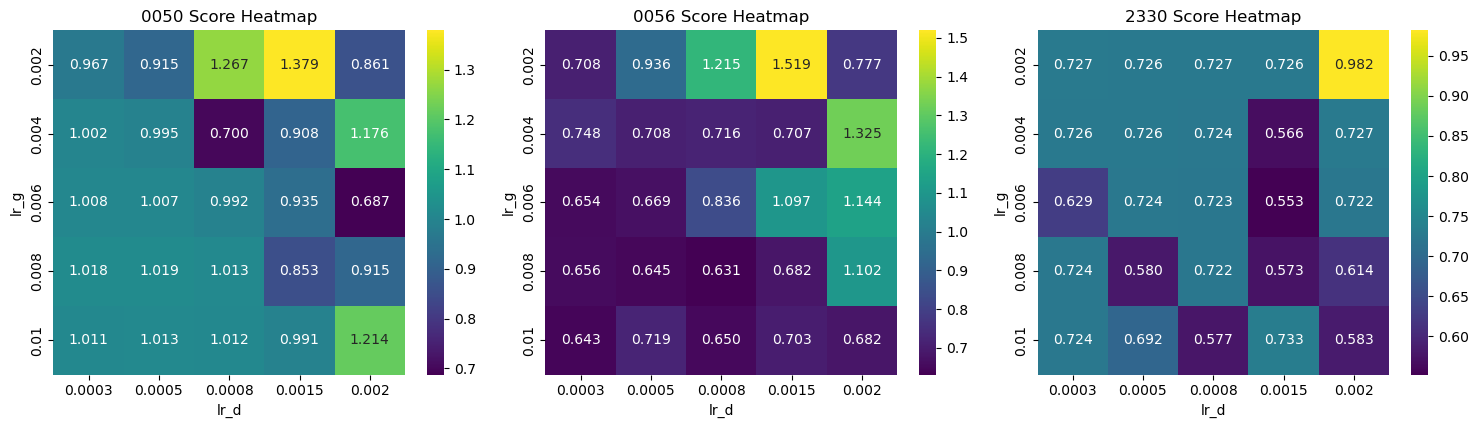

{'0050': lr_d     0.0003    0.0005    0.0008    0.0015    0.0020
 lr_g                                                   
 0.002  0.966982  0.914681  1.267156  1.379080  0.861360
 0.004  1.001999  0.994673  0.700129  0.907621  1.175688
 0.006  1.007936  1.007377  0.991706  0.934845  0.687410
 0.008  1.017952  1.019384  1.012849  0.852859  0.915344
 0.010  1.011101  1.013047  1.011540  0.991145  1.214332,
 '0056': lr_d     0.0003    0.0005    0.0008    0.0015    0.0020
 lr_g                                                   
 0.002  0.707686  0.936457  1.215278  1.519361  0.776728
 0.004  0.747786  0.708218  0.715508  0.707486  1.325351
 0.006  0.653540  0.668898  0.835526  1.096826  1.143911
 0.008  0.655762  0.645181  0.631023  0.681556  1.102270
 0.010  0.642938  0.719111  0.650251  0.703478  0.682075,
 '2330': lr_d     0.0003    0.0005    0.0008    0.0015    0.0020
 lr_g                                                   
 0.002  0.727433  0.726079  0.726573  0.726145  0.981615
 0.00

In [ ]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


with open("result.txt", "r", encoding="utf-8") as f:
    text = f.read()

pattern = r"\[INFO\]\s*(\d+)\s+lr_g=([0-9.]+)\s+lr_d=([0-9.]+)\s*->\s*score=([0-9.]+)"
matches = re.findall(pattern, text)

df = pd.DataFrame(matches, columns=["stock", "lr_g", "lr_d", "score"])
df["lr_g"] = df["lr_g"].astype(float)
df["lr_d"] = df["lr_d"].astype(float)
df["score"] = df["score"].astype(float)


stocks = ["0050", "0056", "2330"]
plt.figure(figsize=(15, 12))

tables = {}

for i, s in enumerate(stocks, 1):
    sub = df[df["stock"] == s]
    pivot = sub.pivot(index="lr_g", columns="lr_d", values="score")
    tables[s] = pivot
    
    plt.subplot(3, 3, i)
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis")
    plt.title(f"{s} Score Heatmap")
    plt.xlabel("lr_d")
    plt.ylabel("lr_g")

plt.tight_layout()
plt.show()

tables  


In [1]:
from LOB_GAN_training_adjusted import train_lob_gan

stock_list = ["0050", "0056", "2330"]

lr_config = {
    "0050": {"lr_g": 0.004, "lr_d": 0.0008},
    "0056": {"lr_g": 0.006, "lr_d": 0.0005},
    "2330": {"lr_g": 0.0045, "lr_d": 0.0012},
}


batch_config = {
    "0050": 50,
    "0056": 50,
    "2330": 50,
}

results_adjusted = {}

for stock in stock_list:
    print(f"===== Training ADJUSTED GAN for {stock} =====")
    cfg = lr_config[stock]
    bs = batch_config[stock]
    res = train_lob_gan(
        stock=stock,
        lr_g=cfg["lr_g"],
        lr_d=cfg["lr_d"],
        batch_size=bs,
        seed=307,
    )
    results_adjusted[stock] = res


===== Training ADJUSTED GAN for 0050 =====
Raw data loading and processing 0050
Data 1 for 0050 loaded.
Data 2 for 0050 loaded.
Data 3 for 0050 loaded.
Minutely data generated.
Start training 0050: epochs=200, batch_size=50, lr_g=0.004, lr_d=0.0008
[Epoch 1/200][Batch 1/1][D train loss: 0.250004][G train loss: 1.297082]
[Epoch 1/200][Batch 1/1][D eval loss: 0.250009][G eval loss: 1.118483]
[Epoch 2/200][Batch 1/1][D train loss: 0.250008][G train loss: 1.270163]
[Epoch 2/200][Batch 1/1][D eval loss: 0.249997][G eval loss: 1.108594]
[Epoch 3/200][Batch 1/1][D train loss: 0.249995][G train loss: 1.260239]
[Epoch 3/200][Batch 1/1][D eval loss: 0.249986][G eval loss: 1.108031]
[Epoch 4/200][Batch 1/1][D train loss: 0.249982][G train loss: 1.259625]
[Epoch 4/200][Batch 1/1][D eval loss: 0.249979][G eval loss: 1.107663]
[Epoch 5/200][Batch 1/1][D train loss: 0.249973][G train loss: 1.259283]
[Epoch 5/200][Batch 1/1][D eval loss: 0.249967][G eval loss: 1.106205]
[Epoch 6/200][Batch 1/1][D trai